In [48]:
# preprocessing lib
from sklearn import preprocessing
# Class training KNN
from sklearn.neighbors import KNeighborsClassifier
# Evaluasi model
from sklearn import metrics
# visal, create data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [79]:
# load dataset
# ubah fitur ke dlm bntuk integer
gender_df = pd.read_csv('gender_class.csv')
del gender_df["Favorite Beverage"]
del gender_df["Favorite Color"]
list_music = set(gender_df["Favorite Music Genre"])
list_drink = set(gender_df["Favorite Soft Drink"])

lbEncode = preprocessing.LabelEncoder()
gender_df["Favorite Music Genre"] = lbEncode.fit_transform(gender_df["Favorite Music Genre"])
gender_df["Favorite Soft Drink"] = lbEncode.fit_transform(gender_df["Favorite Soft Drink"])

gender_df

,Favorite Music Genre,Favorite Soft Drink,Gender
0,6,0,F
1,2,1,F
2,6,1,F
3,1,2,F
4,6,1,F
...,...,...,...
61,6,1,M
62,2,1,M
63,2,2,M
64,6,1,M


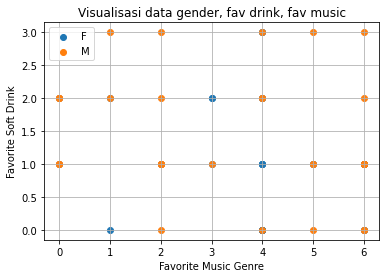

In [80]:
# Visualisasi dataframe
fig, ax = plt.subplots()
[ax.scatter(d["Favorite Music Genre"], d["Favorite Soft Drink"], label=gend) for gend, d in gender_df.groupby("Gender")]
plt.legend(loc="upper left")
plt.title("Visualisasi data gender, fav drink, fav music")
plt.xlabel("Favorite Music Genre")
plt.ylabel("Favorite Soft Drink")
plt.grid(True)
plt.show()

In [81]:
# Preprocessing dataset
x_train = np.array(gender_df[["Favorite Music Genre", "Favorite Soft Drink"]])
y_train = np.array(gender_df["Gender"])

# Konversi gender ke integer menggunakan LabelBinarizer
lbz = preprocessing.LabelBinarizer()
y_train = lbz.fit_transform(y_train)

# karena hasil konversi array 2D hrus di flat dulu biar jadi 1D
y_train = y_train.flatten()


print(f"Hasil konversi gender ke binarisation y_train :\n{y_train}\nx_train:\n{x_train}")

Hasil konversi gender ke binarisation y_train :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
x_train:
[[6 0]
 [2 1]
 [6 1]
 [1 2]
 [6 1]
 [3 2]
 [4 1]
 [4 2]
 [6 0]
 [4 1]
 [4 0]
 [4 0]
 [4 0]
 [0 1]
 [6 1]
 [3 1]
 [4 0]
 [6 1]
 [6 1]
 [4 0]
 [4 2]
 [3 2]
 [6 1]
 [4 1]
 [1 0]
 [5 1]
 [4 3]
 [4 3]
 [4 1]
 [0 2]
 [6 1]
 [6 1]
 [5 1]
 [5 3]
 [2 0]
 [0 1]
 [6 1]
 [4 2]
 [4 2]
 [6 0]
 [6 1]
 [4 0]
 [5 1]
 [6 0]
 [1 3]
 [2 1]
 [2 1]
 [5 0]
 [6 3]
 [2 1]
 [5 1]
 [6 1]
 [2 3]
 [6 2]
 [0 2]
 [0 2]
 [1 2]
 [0 2]
 [3 1]
 [4 3]
 [0 1]
 [6 1]
 [2 1]
 [2 2]
 [6 1]
 [0 1]]


In [82]:
# Training KNN Classification Model
# nilai k untuk jumlah tetangga terdekat yang akan di libatkan untuk proses prediksi
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [83]:
print(f"Music : {list_music}\nDrink : {list_drink}")

Music : {'Electronic', 'R&B and soul', 'Pop', 'Folk/Traditional', 'Hip hop', 'Jazz/Blues', 'Rock'}
Drink : {'Other', 'Coca Cola/Pepsi', 'Fanta', '7UP/Sprite'}


In [84]:
# konversi string menggunakan lableEncoder agar bisa di prediksi model
music = lbEncode.fit_transform(np.array(["Pop"]))
drink = lbEncode.fit_transform(np.array(["7UP/Sprite"]))
x_new = np.array([music, drink]).reshape(1, -1)
x_new

array([[0, 0]])

In [85]:
# prediksi gender berdasarkan music dan minuman favorit
y_new = model.predict(x_new)
lbz.inverse_transform(y_new)

array(['M'], dtype='<U1')

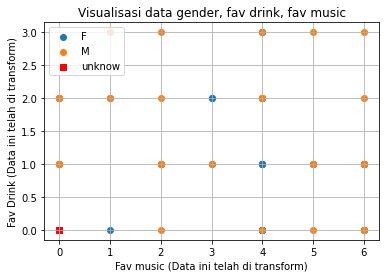

5

In [86]:
# Visualisasi Nearest Neighbours
fig, ax = plt.subplots()
[ax.scatter(d["Favorite Music Genre"], d["Favorite Soft Drink"], label=gend) for gend, d in gender_df.groupby("Gender")]
plt.scatter(
    music,
    drink,
    marker='s', 
    color='red',
    label='unknow'
)
plt.legend(loc="upper left")
plt.title("Visualisasi data gender, fav drink, fav music")
plt.xlabel('Fav music (Data ini telah di transform)')
plt.ylabel('Fav Drink (Data ini telah di transform)')
plt.grid(True)
plt.show()
'''
Bisa di lihat pada titik unknow adalah gender yg di prediksi
dan klau di lihat pada tetangga terdekatnya titik tersebut
paling dekat dengan 2 wanita, 1 pria, maknya model
memprediksi bahwa gender ny wanita
'''
k

In [110]:
# Evaluasi tingkat akurasi model
x_test = np.array(lbEncode.fit_transform(
    ["Electronic", "Coca Cola/Pepsi", "Pop", "Other", 
     "Rock", "7UP/Sprite", "Rock", "Coca Cola/Pepsi"]
)).reshape(-1, 2)

y_test = lbz.transform(
    np.array(
        ["M", "M", "M", "F"]
    )
).flatten()

print(f"x_test : {x_test}\ny_test : {y_test}")
y_pred = model.predict(x_test)
print(f"y_pred : {y_pred}")

x_test : [[2 1]
 [4 3]
 [5 0]
 [5 1]]
y_test : [1 1 1 0]
y_pred : [1 1 0 1]


In [111]:
'''
Teknik yang paling di rekomendasikan untuk evalusai model
Evalusai model menggunakan classificasion report
dari sklearn.metrics
yang biasanya di gunakan untuk melihat ke 4 score di atas
di kolom pertama ada 0 dan satu yang mendefinisikan score dari mines=0, dan positif=1
'''
clss_report = metrics.classification_report(y_test, y_pred)
print(f"Classificaion report :\n{clss_report}")

Classificaion report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4

